In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('heart_unsorted2.csv')

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [42]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [43]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [44]:
model = BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
model.fit(trainX, trainy)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [45]:
y_score = model.predict_proba(testX)[:,-1]

In [46]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(testy, y_score)

print('Average precision-recall score Bagging Classifier: {}'.format(average_precision))

Average precision-recall score Bagging Classifier: 0.8673425091194444


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

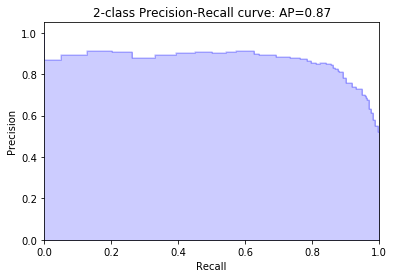

In [47]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(testy, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
